# Custom Quadtree Tutorial

``astroQTpy`` is designed to be flexible so that you can define your own quadtree class. We'll take a closer look in this tutorial at how you can do this using ``astroQTpy``'s `BaseTree` abstract class.

First, you'll need to import each of the base components of ``astroQTpy``.

In [1]:
import numpy as np

from astroqtpy.basetree import BaseTree
from astroqtpy.quadnode import QuadNode
from astroqtpy.quadpoint import QuadPoint

You can write your own quadtree class by creating a new Python class that inherits the `BaseTree` superclass. At minimum, your `__init__` method must take at least four arguments: the x and y lower and upper limits. These must also be passed to the `__init__` method of the superclass.

The only other requirement for your new class is to include a `evaluate_point` method, which takes a `QuadNode` object and an integer random number generator seed as arguments. Your `evaluate_point` method must return a `QuadPoint` object.

This example shows the most basic implementation of `BaseTree`. Our class, which we'll call `MyQuadTree`, will simply fill a quadtree with random points containing either a one or a zero.

In [2]:
class MyQuadTree(BaseTree):
    """Custom quadtree.

    A custom class for creating a quadtree with randomly sampled points.

    Args:
        x_min (float): Minimum x value for this quadtree.
        x_max (float): Maximum x value for this quadtree.
        y_min (float): Minimum y value for this quadtree.
        y_max (float): Maximum y value for this quadtree.
    """
    
    def __init__(self, x_min: float, x_max: float, y_min: float, y_max: float) -> None:
        super().__init__(x_min, x_max, y_min, y_max,
                        filename_points = './tutorial_outputs/custom_points.txt',
                        filename_nodes = './tutorial_outputs/custom_nodes.txt'
                        )
        
        
    def evaluate_point(self, node: QuadNode, rng_seed: int) -> QuadPoint:
        """Evaluate point.

        Calculate the value of one point within a given node as either 1 or 0.

        Args:
            node (QuadNode): Quadtree node in which to evaulate point.
            rng_seed (int): Random number generator seed.

        Returns:
            QuadPoint: A QuadPoint object.
        """
        rng = np.random.default_rng(rng_seed)
        
        point = QuadPoint(
            rng.uniform(node.x_min, node.x_max),
            rng.uniform(node.y_min, node.y_max),
            rng.choice([1, 0])
            )
    
        return point

We can now create a new instance of `MyQuadTree` and run it! We'll also make a quick plot of the quadtree.

In [3]:
test_tree = MyQuadTree(1,2,3,4)
test_tree.run_quadtree()

Attempting to load previous results...
   No previous results found, starting new...
DONE! :)


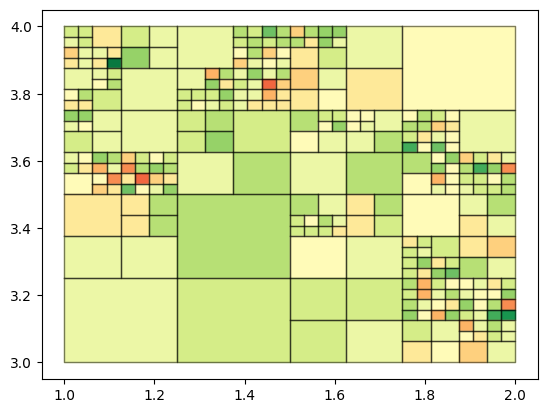

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
test_tree.draw_tree(ax=ax); 

We can also give our custom quadtree class some extra bells and whistles. The following example demonstrates how you might include custom attributes and methods inside your quadtree class. Here, we again fill a quadtree with random points, but we'll asign each point a random integer between 0 and 100, and print a message each time we evaluate a point.

In [5]:
class MyFancyQuadTree(BaseTree):
    """Custom fancy quadtree.

    A class for creating a quadtree with randomly sampled points.

    Args:
        x_min (float): Minimum x value for this quadtree.
        x_max (float): Maximum x value for this quadtree.
        y_min (float): Minimum y value for this quadtree.
        y_max (float): Maximum y value for this quadtree.
        split_threshold (float, optional): Threshold discrepancy in order to split nodes. Defaults to 0.2.
        node_statistic (str, optional): Statistic to compute node values ['mean', 'std', or 'median']. Defaults to 'mean'.
        N_points (int, optional): Maximum number of points per node. Defaults to 20.
        min_depth (int, optional): Minimum quadtree depth. Defaults to 3.
        max_depth (int, optional):  Maximum quadtree depth. Defaults to 6.
        N_proc (int, optional): Number of cores for multiprocessing. Defaults to 1.
        verbose (bool, optional): Option to print node values in real time. Defaults to False.
        filename_points (str, optional): Name of output file to save points. Defaults to 'points.txt'.
        filename_nodes (str, optional): Name of output file to save nodes. Defaults to 'nodes.txt'.
        my_arg (str, optional): Argument for this custom class. Defaults to 'foo'.
    """
    
    def __init__(self,
                 x_min: float,
                 x_max: float,
                 y_min: float,
                 y_max: float,
                 split_threshold: float = 0.2,
                 node_statistic: str = 'mean',
                 N_points: int = 20,
                 min_depth: int = 3,
                 max_depth: int = 6,
                 N_proc: int = 1,
                 verbose: bool = False,
                 filename_points: str = 'points.txt',
                 filename_nodes: str = 'nodes.txt',
                 my_arg: str = 'foo'
                 ) -> None:

        super().__init__(x_min, x_max, y_min, y_max,
                         split_threshold, node_statistic, N_points,
                         min_depth, max_depth, N_proc,
                         verbose, filename_points, filename_nodes
                         )
        
        # initialize custom args
        self.my_arg = my_arg
        
    
    def custom_function(self, arg1: str, arg2: int, arg3: str = 'bar') -> None:
        """Custom function.
        
        It can do whatever you want!
        
        Args:
            arg1 (str): Your first argument.
            arg2 (int): Your second argument.
            arg3 (str, optional): Your third argument. Defaults to 'bar'.
        """
        
        # ... do something! ...
        
        print("{:}-{:}: {:}".format(arg1, arg2, arg3))
        
        return 
    
    
    def evaluate_point(self, node: QuadNode, rng_seed: int) -> QuadPoint:
        """Evaluate point.

        Calculate the value of one point within a given node.

        Args:
            node (QuadNode): Quadtree node in which to evaulate point.
            rng_seed (int, optional): Random number generator seed. Defaults to 123456.

        Returns:
            QuadPoint: A QuadPoint object.
        """
        rng = np.random.default_rng(rng_seed)
        
        my_int = rng.integers(0, 100)
        
        # call custom function
        self.custom_function(self.my_arg, my_int)
        
        point = QuadPoint(
            rng.uniform(node.x_min, node.x_max),
            rng.uniform(node.y_min, node.y_max),
            my_int
            )
    
        return point

Create a new instance and run the quadtree.

In [6]:
test_tree = MyFancyQuadTree(1,2,3,4, max_depth=4, split_threshold=50, N_points=1,
                            filename_points='./tutorial_outputs/custom_fancy_points.txt',
                            filename_nodes='./tutorial_outputs/custom_fancy_nodes.txt')
test_tree.run_quadtree()

Attempting to load previous results...
   No previous results found, starting new...
foo-44: bar
foo-18: bar
foo-22: bar
foo-34: bar
foo-84: bar
foo-49: bar
foo-94: bar
foo-12: bar
foo-39: bar
foo-26: bar
foo-9: bar
foo-0: bar
foo-81: bar
foo-39: bar
foo-21: bar
foo-73: bar
foo-42: bar
foo-99: bar
foo-31: bar
foo-93: bar
foo-72: bar
foo-95: bar
foo-65: bar
foo-31: bar
foo-17: bar
foo-6: bar
foo-31: bar
foo-13: bar
foo-9: bar
foo-36: bar
foo-29: bar
foo-51: bar
foo-71: bar
foo-0: bar
foo-57: bar
foo-34: bar
foo-16: bar
foo-52: bar
foo-40: bar
foo-17: bar
foo-55: bar
foo-5: bar
foo-20: bar
foo-40: bar
foo-33: bar
foo-35: bar
DONE! :)


And make a quick plot just for fun.

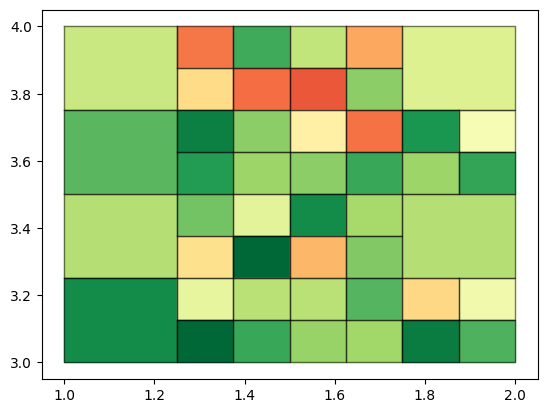

In [7]:
fig, ax = plt.subplots()
test_tree.draw_tree(ax=ax); 